<a href="https://colab.research.google.com/github/Melkateb/Face-Recognition/blob/main/Use_different_Training_and_Test_splits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download non-face images**

In [ ]:
!unzip archive.zip
!unzip landscape.zip

Archive:  archive.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  landscape.zip
replace landscape/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Make them of same size 92x112. and try to solve the classification problem faces vs. Non-faces.**

In [ ]:
from os import listdir
from PIL import Image as PImage
import numpy as np
import scipy.linalg as la
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

id = 1
def face_vs_nonface(nonface_size):
  train_set = []
  test_set = []
  train_labels = []
  test_labels = []
  data_set = []
  Y = []

  for id in range(1,41):
      for count in range(1,11) :
        image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')
        test = img_to_array(image)
        test = np.resize(test,(10304))
        data_set.append(test)
        Y.append("face")
  
  for i in range(nonface_size):
    image = Image.open('landscape'+'/'+str(i)+'.jpg')
    image = image.resize((92,112))
    test = img_to_array(image)
    test = np.resize(test,(10304))
    data_set.append(test)
    Y.append("non-face")

  for i in range(len(data_set)):
    if i%2 == 0:
      test_set.append(data_set[i])
      test_labels.append(Y[i])
    else:
      train_set.append(data_set[i])
      train_labels.append(Y[i])
      
  D = np.array(data_set)
  train_set = np.array(train_set)
  test_set = np.array(test_set)
  train_label = np.array(train_labels)
  test_label = np.array(test_labels)

  data_M = np.mean(data_set,axis=0) 
  train_M = np.mean(train_set,axis=0) 
  test_M = np.mean(test_set,axis=0) 

  data_Z = data_set-data_M 
  cov = 1/len(data_set)*np.dot(data_Z.T,data_Z)
  
  eigenvalue , eigenvector = la.eig(cov)

  alpha = 0.9
  Accuracy = []
  
  index = eigenvalue.argsort()[::-1]   
  eigenvalue = eigenvalue[index]
  eigenvector = eigenvector[:,index]

  data_variance = np.sum(eigenvalue.real)                           #compute data set variance
  variance_ratio, num_dimensions, eigValSum = 0,0,0     
  while(variance_ratio < alpha):
      eigValSum += eigenvalue[num_dimensions]
      variance_ratio = eigValSum/data_variance
      num_dimensions += 1
  
  projection_matrix = eigenvector[:,0:num_dimensions]

  train_Z = np.subtract(train_set,train_M)
  reduced_dim_train = projection_matrix.T @ train_Z.T

  test_Z = np.subtract(test_set,test_M)
  reduced_dim_test = projection_matrix.T @ test_Z.T

  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(reduced_dim_train.real.T,train_label)
  pred = knn.predict(reduced_dim_test.real.T)

  correct = 0.0
  test_len = len(test_label)
  
  for a in range(test_len):
      if isinstance(pred[a],int):
        pred[a] = "face"
      if pred[a] == test_label[a]:
        correct += 1.0
        print("Predicted: ",str(pred[a])," it is ",str(test_label[a])," RIGHT")
      else:
        print("Predicted: ",str(pred[a])," it is ",str(test_label[a])," WRONG")
  Accuracy = correct/float(test_len) 
  return Accuracy

**i. Show failure and success cases.
ii. Plot the accuracy vs the number of non-faces images while fixing
the number of face images.**

Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
Predicted:  face  it is  face  RIGHT
P

Text(0, 0.5, 'Accuracy')

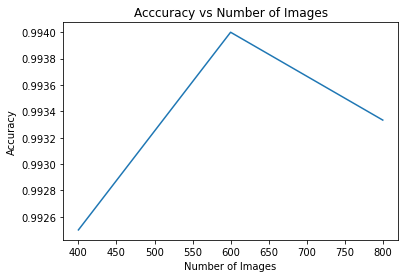

In [ ]:
Accuracy = []
num_images = np.array([400,600,800])

for n in range (0,3): 
  Accuracy.append(face_vs_nonface(num_images[n]))

plt.plot(num_images,Accuracy)
plt.title("Acccuracy vs Number of Images")
plt.xlabel('Number of Images')
plt.ylabel('Accuracy')